In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from keras.losses import MeanAbsolutePercentageError
import joblib

Using TensorFlow backend.
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#read file
read_file= pd.read_csv('ann_data_ec.txt', sep='	')
data=read_file.iloc[:,:5]
data=data.dropna()
data=data.astype(float)
data
#data.columns=['J','C_old','soc_old','C_dot','soc_dot','d']
df=data
df

,j,c_old,soc_old,c_dot,soc_dot
0,-1.00000,0.500000,0.500000,99.70763,3.00000
1,-1.00000,0.509971,0.500300,66.16920,3.00000
2,-1.00000,0.516588,0.500600,49.71016,3.00000
3,-1.00000,0.521559,0.500900,40.67121,3.00000
4,-1.00000,0.525626,0.501200,35.12760,3.00000
...,...,...,...,...,...
6280,-0.00001,0.986665,0.986662,0.00003,0.00003
6281,-0.00001,0.990865,0.990862,0.00003,0.00003
6282,-0.00001,0.995065,0.995062,0.00003,0.00003
6283,-0.00001,0.999265,0.999262,0.00003,0.00003


In [3]:
list(dict.fromkeys(df['j']))

[-1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 -0.09,
 -0.08,
 -0.07,
 -0.06,
 -0.05,
 -0.04,
 -0.03,
 -0.02,
 -0.01,
 -0.009000000000000001,
 -0.008,
 -0.006999999999999999,
 -0.006,
 -0.005,
 -0.004,
 -0.003,
 -0.002,
 -0.001,
 -0.0009,
 -0.0008,
 -0.0007,
 -0.0006,
 -0.0005,
 -0.0004,
 -0.0003,
 -0.0002,
 -0.0001,
 -9e-05,
 -8e-05,
 -7e-05,
 -5.9999999999999995e-05,
 -5e-05,
 -4e-05,
 -2.9999999999999997e-05,
 -2e-05,
 -1e-05]

In [4]:
#list(dict.fromkeys(df['j']))

In [5]:
df=data

In [6]:
df['j']=-np.log10( df['j']*-1)
df['c_dot']=-np.log10( df['c_dot'])
#df['j']=-np.log10( df['j']*-1)  

In [7]:
min(df['j'])

-0.0

In [8]:
df=df[df['j']<3.1]
df=df[df['j']>0.04575748]
#df

In [9]:
list(dict.fromkeys(df['j']))

[0.045757490560675115,
 0.09691001300805639,
 0.1549019599857432,
 0.2218487496163564,
 0.3010299956639812,
 0.3979400086720376,
 0.5228787452803376,
 0.6989700043360187,
 1.0,
 1.0457574905606752,
 1.0969100130080565,
 1.154901959985743,
 1.2218487496163564,
 1.3010299956639813,
 1.3979400086720375,
 1.5228787452803376,
 1.6989700043360187,
 2.0,
 2.0457574905606752,
 2.0969100130080562,
 2.154901959985743,
 2.221848749616356,
 2.3010299956639813,
 2.3979400086720375,
 2.5228787452803374,
 2.6989700043360187,
 3.0,
 3.0457574905606752,
 3.0969100130080562]

In [10]:
df

,j,c_old,soc_old,c_dot,soc_dot
124,0.045757,0.500000,0.500000,-1.952971,2.7000
125,0.045757,0.508974,0.500270,-1.774898,2.7000
126,0.045757,0.514929,0.500540,-1.650688,2.7000
127,0.045757,0.519403,0.500810,-1.563530,2.7000
128,0.045757,0.523063,0.501080,-1.499891,2.7000
...,...,...,...,...,...
4136,3.096910,0.987184,0.986955,2.619789,0.0024
4137,3.096910,0.991024,0.990795,2.619789,0.0024
4138,3.096910,0.994864,0.994635,2.619789,0.0024
4139,3.096910,0.998704,0.998475,2.619789,0.0024


In [11]:
#df=df[df['J']<-0.001]


In [12]:
#data_num = data.to_numpy()
#print(data_num[0,:])

In [13]:
#reduced_data = np.array([])
#reduced_data2 = np.array([])

#number = 0

# for i in data_num[:]:
    
#     if i[0] <= -0.25:
        
#         number += 1
#         #print(number)
#         reduced_data = np.append(reduced_data, i, axis = 0 )
#         #reduced_data.append(i)
    
#     else:
        #max
#         reduced_data2 = np.append(reduced_data2, i, axis = 0 )
        
    
# reduced_data = np.reshape(reduced_data, (int(reduced_data.shape[0]/3), 3))

# print(" number of elements for j < -0. 25 size is ",reduced_data.shape)


# reduced_data2 = np.reshape(reduced_data2, (int(reduced_data2.shape[0]/3), 3))

# print(" number of elements for j > -0. 25 size is ", reduced_data2.shape)

# print( "In total there are  " + str(int(reduced_data.shape[0]) + int(reduced_data2.shape[0])) + " samples")


In [14]:
#plt.hist(reduced_data[:,0])

In [15]:
#plt.hist(reduced_data2[:,0])

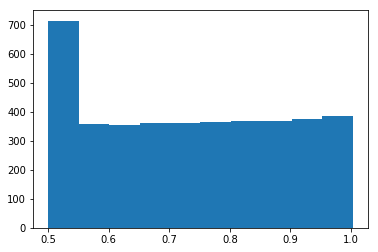

In [16]:
plt.hist(df['c_old'])
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

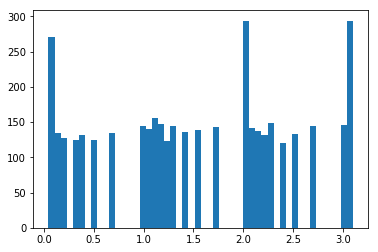

In [17]:
plt.hist(df['j'],bins=50)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

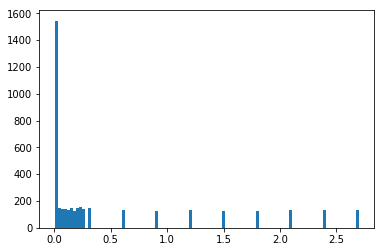

In [18]:
plt.hist(df['soc_dot'],bins=100)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

In [19]:
print(min(df['c_dot']))
print(max(df['c_dot']))

-1.9529709173762972
2.619788758288394


## transformation

In [20]:
X=df.iloc[:,0:3]
y=df.iloc[:,3:5]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=40)

from sklearn.preprocessing import MinMaxScaler 
#scaler = StandardScaler()

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled_data=scaler.transform(X_train)
X_test_scaled_data=scaler.transform(X_test)

scaler_y = MinMaxScaler()

#scaler_y = StandardScaler()
scaler_y.fit(np.array(y_train))
y_train_scaled_data=scaler_y.transform(np.array(y_train))
y_test_scaled_data=scaler_y.transform(np.array(y_test))

In [21]:
#print(np.shape(X_test_scaled_data))
print(np.shape(y_train_scaled_data))

(3012, 2)


In [22]:
#sns.pairplot(df, plot_kws={"s": 2})

In [23]:
#plt.hist(X['C_old'])

In [ ]:
#plt.hist(X['J'])

In [ ]:
# ## Hyperperameter checking, takes very long time (BATCH)


# t = np.linspace(10,300,20)

# log_mse = []
# log_mae = []

# for i in t:


#     mlp=MLPRegressor(
#     hidden_layer_sizes=(11*64,),
#     activation='relu',
#     solver='adam',
#     alpha=0.0001,
#     batch_size=int(i),
#     learning_rate='invscaling',
#     learning_rate_init=0.001,
#     power_t= 0.9,
#     max_iter=20000,
#     shuffle=False,
#     random_state=None,
#     tol=1e-08,
#     verbose=True,
#     warm_start=False,
#     momentum=0.9,
#     nesterovs_momentum=True,
#     early_stopping=False,
#     validation_fraction=0.1,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-08,
#     n_iter_no_change=10,
#        )
#     M11_s=mlp.fit(X_train_scaled_data, y_train_scaled_data)
#     y_pred = M11_s.predict(X_test_scaled_data)
#     y_pred_train= M11_s.predict(X_train_scaled_data)
#     mseMLP = mean_squared_error(y_test_scaled_data, y_pred)
#     maeMLP = mean_absolute_error(y_test_scaled_data, y_pred)
#     print("Train R2 score MLP: {:.5f}".format(M11_s .score(X_train_scaled_data, y_train_scaled_data)))
#     print("Test R2 score MLP: {:.5f}".format(M11_s.score(X_test_scaled_data, y_test_scaled_data)))
#     print("MSE MLP: %.4f" % mseMLP)
#     print("MAE MLP:", maeMLP)
#     #filename = 'MLP_02022021_BB.sav'
#     #joblib.dump(M11_s, filename)
    
#     log_mse.append(mseMLP)
#     log_mae.append(maeMLP)
    
# plt.plot(t,log_mse)
# plt.figure()
# plt.plot(t,log_mae)


In [ ]:
# #### ## Hyperperameter checking (neuron), takes very long time (alpha)


# t = np.linspace(1,200,10)

# log_mse = []
# log_mae = []

# for i in t:


#     mlp=MLPRegressor(
#     hidden_layer_sizes=(11*64,),
#     activation='relu',
#     solver='adam',
#     alpha=0.0000001*i,
#     batch_size=int(170),
#     learning_rate='invscaling',
#     learning_rate_init=0.001,
#     power_t= 0.9,
#     max_iter=20000,
#     shuffle=False,
#     random_state=None,
#     tol=1e-08,
#     verbose=False,
#     warm_start=False,
#     momentum=0.9,
#     nesterovs_momentum=True,
#     early_stopping=False,
#     validation_fraction=0.1,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-08,
#     n_iter_no_change=10,
#        )
#     M11_s=mlp.fit(X_train_scaled_data, y_train_scaled_data)
#     y_pred = M11_s.predict(X_test_scaled_data)
#     y_pred_train= M11_s.predict(X_train_scaled_data)
#     mseMLP = mean_squared_error(y_test_scaled_data, y_pred)
#     maeMLP = mean_absolute_error(y_test_scaled_data, y_pred)
#     print("Train R2 score MLP: {:.5f}".format(M11_s .score(X_train_scaled_data, y_train_scaled_data)))
#     print("Test R2 score MLP: {:.5f}".format(M11_s.score(X_test_scaled_data, y_test_scaled_data)))
#     print("MSE MLP: %.4f" % mseMLP)
#     print("MAE MLP:", maeMLP)
#     #filename = 'MLP_02022021_BB.sav'
#     #joblib.dump(M11_s, filename)
    
    
    
#     log_mse.append(mseMLP)
#     log_mae.append(maeMLP)
    
# plt.plot(t,log_mse)
# plt.figure()
# plt.plot(t,log_mae)


In [ ]:
# ## Hyperperameter checking (neuron), takes very long time (neuron)


# t = range(1,120,10)

# log_mse = []
# log_mae = []

# for i in t:


#     mlp=MLPRegressor(
#     hidden_layer_sizes=(i*64,),
#     activation='relu',
#     solver='adam',
#     alpha=0.002,
#     batch_size=300,
#     learning_rate='invscaling',
#     learning_rate_init=0.001,
#     power_t= 0.9,
#     max_iter=20000,
#     shuffle=False,
#     random_state=None,
#     tol=1e-08,
#     verbose=True,
#     warm_start=False,
#     momentum=0.9,
#     nesterovs_momentum=True,
#     early_stopping=False,
#     validation_fraction=0.1,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-08,
#     n_iter_no_change=10,
#        )
#     M11_s=mlp.fit(X_train_scaled_data, y_train_scaled_data)
#     y_pred = M11_s.predict(X_test_scaled_data)
#     y_pred_train= M11_s.predict(X_train_scaled_data)
#     mseMLP = mean_squared_error(y_test_scaled_data, y_pred)
#     maeMLP = mean_absolute_error(y_test_scaled_data, y_pred)
#     print("Train R2 score MLP: {:.5f}".format(M11_s .score(X_train_scaled_data, y_train_scaled_data)))
#     print("Test R2 score MLP: {:.5f}".format(M11_s.score(X_test_scaled_data, y_test_scaled_data)))
#     print("MSE MLP: %.4f" % mseMLP)
#     print("MAE MLP:", maeMLP)
#     #filename = 'MLP_02022021_BB.sav'
#     #joblib.dump(M11_s, filename)
    
#     log_mse.append(mseMLP)
#     log_mae.append(maeMLP)
    
# plt.plot(t,log_mse)
# plt.figure()
# plt.plot(t,log_mae)


In [ ]:
# #build model with the best hyper parameters from the aboce cells:
# mlp=MLPRegressor(
#    hidden_layer_sizes=(11*64,),
#    activation='relu',
#    solver='adam',
#    alpha=0.00001,
#    batch_size=300,
#    learning_rate='invscaling',
#    learning_rate_init=0.001,
#    power_t= 0.9,
#    max_iter=200000,
#    shuffle=False,
#    random_state=None,
#    tol=1e-08,
#    verbose=False,
#    warm_start=False,
#    momentum=0.9,
#    nesterovs_momentum=True,
#    early_stopping=True,
#    validation_fraction=0.1,
#    beta_1=0.9,
#    beta_2=0.999,
#    epsilon=1e-08,
#    n_iter_no_change=10,
#    )
# #M11_s=mlp.fit(X_train_scaled_data, y_train_scaled_data)

# y_pred = M11_s.predict(X_test_scaled_data)
# y_pred_train= M11_s.predict(X_train_scaled_data)
# mseMLP = mean_squared_error(y_test_scaled_data, y_pred)
# maeMLP = mean_absolute_error(y_test_scaled_data, y_pred)
# print("Train R2 score MLP: {:.5f}".format(M11_s .score(X_train_scaled_data, y_train_scaled_data)))
# print("Test R2 score MLP: {:.5f}".format(M11_s.score(X_test_scaled_data, y_test_scaled_data)))
# print("MSE MLP: %.4f" % mseMLP)  
# print("MAE MLP:", maeMLP)
# #filename = 'MLP_02022021_BB.sav'
# #joblib.dump(M11_s, filename)

In [ ]:
#filename = 'MLP_160321_MaxMinScale_log_soc_ec_v5.sav'
#joblib.dump(M11_s, filename)

In [26]:
#load the saved model and test the performance
import joblib
M11_s= joblib.load('MLP_160321_MaxMinScale_log_soc_ec_v4.sav')
y_pred = M11_s.predict(X_test_scaled_data)
y_pred_train= M11_s.predict(X_train_scaled_data)
mseMLP = mean_squared_error(y_test_scaled_data, y_pred)


print("R2 train MLP:", r2_score(y_train_scaled_data, y_pred_train))
print("R2 test MLP:}", r2_score(y_test_scaled_data, y_pred))

print("MAE train MLP:", mean_absolute_error(y_train_scaled_data, y_pred_train))
print("MAE test MLP:", mean_absolute_error(y_test_scaled_data, y_pred))

print("MSE train MLP:", mean_squared_error(y_train_scaled_data, y_pred_train))
print("MSE test MLP:", mean_squared_error(y_test_scaled_data, y_pred))



# print("Train R2 score MLP: {:.7f}".format(M11_s.score(X_train_scaled_data, y_train_scaled_data)))
# print("Test R2 score MLP: {:.7f}".format(M11_s.score(X_test_scaled_data, y_test_scaled_data)))
# print("MSE MLP: %.7f" % mseMLP)
# print("MAE MLP:", mean_absolute_error(y_test_scaled_data, y_pred))

R2 train MLP: 0.9981807204854328
R2 test MLP:} 0.9979638492199207
MAE train MLP: 0.0028437709101099837
MAE test MLP: 0.002892951051839128
MSE train MLP: 9.52829054640639e-05
MSE test MLP: 0.00010584076826252408


C:\Users\mfath\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


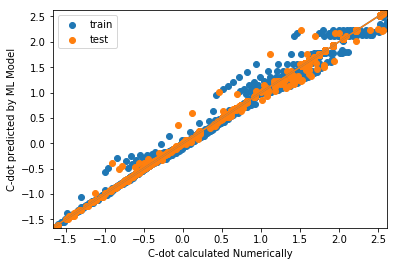

In [27]:
plt.scatter(np.array(y_train.iloc[:,0]),scaler_y.inverse_transform(y_pred_train)[:,0],label='train')
plt.scatter(np.array(y_test.iloc[:,0]),scaler_y.inverse_transform(y_pred)[:,0],label='test')
plt.xlabel('C-dot calculated Numerically')
plt.ylabel('C-dot predicted by ML Model')

lims = [y_test.iloc[:,0].min(), y_test.iloc[:,0].max()]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

_ = plt.plot(lims, lims)
plt.legend()

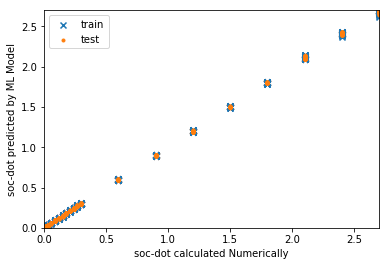

In [28]:
plt.scatter(np.array(y_train.iloc[:,1]),scaler_y.inverse_transform(y_pred_train)[:,1],marker='x',label='train')
plt.scatter(np.array(y_test.iloc[:,1]),scaler_y.inverse_transform(y_pred)[:,1],marker='.',label='test')
plt.xlabel('soc-dot calculated Numerically')
plt.ylabel('soc-dot predicted by ML Model')

lims = [y_test.iloc[:,1].min(), y_test.iloc[:,1].max()]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims,color='g')

#_ = plt.plot(lims, lims)
plt.legend()

In [29]:
list(dict.fromkeys(df['j']))

[0.045757490560675115,
 0.09691001300805639,
 0.1549019599857432,
 0.2218487496163564,
 0.3010299956639812,
 0.3979400086720376,
 0.5228787452803376,
 0.6989700043360187,
 1.0,
 1.0457574905606752,
 1.0969100130080565,
 1.154901959985743,
 1.2218487496163564,
 1.3010299956639813,
 1.3979400086720375,
 1.5228787452803376,
 1.6989700043360187,
 2.0,
 2.0457574905606752,
 2.0969100130080562,
 2.154901959985743,
 2.221848749616356,
 2.3010299956639813,
 2.3979400086720375,
 2.5228787452803374,
 2.6989700043360187,
 3.0,
 3.0457574905606752,
 3.0969100130080562]

In [ ]:
###########################################################################################

In [ ]:
# np.savetxt('scaledLOG_J_16032021.txt',X_train_scaled_data[:,0])
# np.savetxt('scaled_c_dot_16032021.txt',X_train_scaled_data[:,1])
# np.savetxt('scaled_soc_dot_16032021.txt',X_train_scaled_data[:,2])
# np.savetxt('scaled_y1_16032021.txt',y_train_scaled_data[:,0])
# np.savetxt('scaled_y2_16032021.txt',y_train_scaled_data[:,1])
# #np.savetxt('scaled_y3_5032021.txt',y_train_scaled_data[:,2])

In [ ]:
# np.savetxt('weight1_row1_16032021.txt',M11_s.coefs_[0][0,:])
# np.savetxt('weight1_row2_16032021.txt',M11_s.coefs_[0][1,:])
# np.savetxt('weight1_row3_16032021.txt',M11_s.coefs_[0][2,:])

In [ ]:
# np.savetxt('weight2_c1_16032021.txt',M11_s.coefs_[1][:,0])
# np.savetxt('weight2_c2_160322021.txt',M11_s.coefs_[1][:,1])
# #np.savetxt('weight2_c3_15032021.txt',M11_s.coefs_[1][:,2])


In [ ]:
# np.savetxt('bias1_16032021.txt',M11_s.intercepts_[0])
# np.savetxt('bias2_16032021_.txt',M11_s.intercepts_[1])

In [ ]:
# np.savetxt('J_16032021.txt',X_train.iloc[:,0])
# np.savetxt('cOld_16032021.txt',X_train.iloc[:,1])
# np.savetxt('soc_dot_16032021.txt',X_train.iloc[:,2])


In [ ]:
# np.savetxt('y1_16032021.txt',y_train.iloc[:,0])
# np.savetxt('y2_16032021.txt',y_train.iloc[:,1])
# #np.savetxt('y3_16032021.txt',y_train.iloc[:,2])

In [ ]:
#np.savetxt('J_16032021.txt',X_train.iloc[:,0])
#np.savetxt('cOld_16032021.txt',X_train.iloc[:,1])
#np.savetxt('soc_dot_16032021.txt',X_train.iloc[:,2])
